In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import community  # python-louvain package


**Import the country relationships file (that you created in the previous task) as a dataframe in a new notebook.**

In [2]:
relationships_df=pd.read_csv('Relationship.csv')

**Create a network object from the countries relationships dataframe.**

In [3]:
# Create a directed graph (DiGraph) from the relationships dataframe
network = nx.from_pandas_edgelist(relationships_df, source='Country1', target='Country2', create_using=nx.DiGraph())

# Display basic information about the network
print(f"Number of nodes (countries): {network.number_of_nodes()}")
print(f"Number of edges (relationships): {network.number_of_edges()}")

Number of nodes (countries): 54
Number of edges (relationships): 2222


**Inferences**

The network analysis shows that there are 54 countries represented in the network, and they are connected through 2222 edges, which indicates the relationships or co-occurrences between these countries in the text. The high number of edges relative to the number of nodes suggests that many countries are frequently mentioned together.This dense network structure may reveal certain patterns or clusters of countries that are closely associated. These patterns could represent alliances, regional groupings, or shared historical contexts. 

The large number of relationships also suggests that the historical events or discussions covered in the text involve a diverse set of countries, pointing to a global or international context. This network analysis provides valuable insights into the relationships and interactions among the mentioned countries, offering a deeper understanding of the historical or narrative context presented in the text.



**Create a static network graph using only NetworkX.**

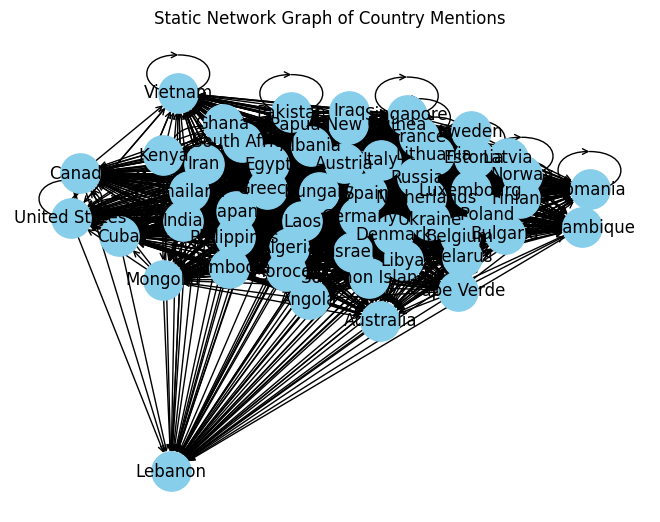

In [4]:
# Create a directed graph (DiGraph) from the relationships dataframe
network = nx.from_pandas_edgelist(relationships_df, source='Country1', target='Country2', create_using=nx.DiGraph())

# Define the layout for node positioning (you can choose other layouts as well)
layout = nx.spring_layout(network)

# Draw nodes and edges
nx.draw(network, pos=layout, with_labels=True, node_color='skyblue', node_size=800, arrowstyle='->', arrowsize=10)

# Set plot title and show the graph
plt.title('Static Network Graph of Country Mentions')
plt.show()

**Inferences**

In the above network diagram, there is one root node and several leaf nodes. The country Lebanon, positioned at the root node or the center of the network, holds significant influence or importance in the context of the data. Its central node position indicates that Lebanon is a pivotal country, playing a key role in the relationships and interactions with other countries.

Additionally, we can observe that the countries directly connected to the root node through outgoing edges share strong ties or associations with Lebanon. These direct connections suggest that these countries have a considerable level of interaction or co-occurrence with Lebanon in the text data.

**Switch to pyvis, build an interactive network graph from your network object, and save it as an HTML file**

In [21]:
import networkx as nx
from pyvis.network import Network

# Create a directed graph (DiGraph) from the relationships dataframe
network = nx.from_pandas_edgelist(relationships_df, source='Country1', target='Country2', create_using=nx.DiGraph())

# Create the pyvis Network object
net = Network(directed=True, notebook=True, cdn_resources='remote')

# Add nodes and edges to the pyvis network
for node in network.nodes:
    net.add_node(node, label=node)

for edge in network.edges:
    net.add_edge(edge[0], edge[1])

# Show the pyvis network
net.show_buttons(filter_=['physics'])
net.show('interactive_network_graph.html')


interactive_network_graph.html


**Apply the Leiden algorithm to detect any communities within the countries.**

In [6]:
# Create an undirected graph from the DataFrame
G = nx.from_pandas_edgelist(relationships_df, source='Country1', target='Country2')

# Apply the Leiden algorithm for community detection
partition = community.best_partition(G)

# Print the detected communities
print(partition)

{'France': 0, 'Italy': 1, 'Russia': 21, 'Germany': 3, 'Austria': 11, 'Hungary': 25, 'Bulgaria': 18, 'Spain': 25, 'Poland': 8, 'Estonia': 9, 'Latvia': 25, 'Lithuania': 25, 'Finland': 12, 'Belgium': 14, 'Netherlands': 25, 'Luxembourg': 25, 'Denmark': 22, 'Norway': 17, 'Sweden': 25, 'Greece': 7, 'Albania': 20, 'Ukraine': 25, 'Belarus': 25, 'Libya': 23, 'Egypt': 10, 'Iraq': 25, 'Japan': 15, 'Morocco': 25, 'Algeria': 25, 'Thailand': 25, 'Singapore': 27, 'Solomon Islands': 26, 'Philippines': 2, 'India': 4, 'Pakistan': 5, 'Israel': 25, 'South Africa': 25, 'Iran': 6, 'Papua New Guinea': 25, 'Laos': 25, 'Cambodia': 13, 'Kenya': 25, 'Ghana': 25, 'Cape Verde': 25, 'Angola': 25, 'Mozambique': 25, 'Romania': 16, 'Mongolia': 25, 'Cuba': 19, 'United States': 24, 'Canada': 25, 'Australia': 25, 'Vietnam': 28, 'Lebanon': 25}


**Inferences**

The output reveal multiplt communities in the text and they vary in size as like Belgium is in a large group of community with 27 countries and others forming smaller group such as Philippines with 0 countries. Israel stands out with the highest community size of 28, indicating that it holds significant importance or plays a central role in the relationships and interactions between countries.

**Visualize the output of the communities algorithm on a new network graph and save it as HTML. Write your observations in a Markdown cell. Does the partition make sense according to history? What other conclusions can you make about the connections between the communities?**

In [7]:
import pandas as pd
import networkx as nx
from pyvis.network import Network

# Convert integer community labels to string labels
community_labels = {node: str(partition[node]) for node in G.nodes()}

# Create the pyvis Network object
net = Network(directed=True, notebook=True, cdn_resources='remote')

# Add nodes
nodes = list(G.nodes())
for node in nodes:
    net.add_node(node, title=node)

# Add edges
edges = list(G.edges())
for edge in edges:
    src, tgt = edge
    net.add_edge(src, tgt)

# Set node colors based on communities
node_colors = [partition[node] for node in nodes]
for i, node in enumerate(nodes):
    net.nodes[i]['color'] = node_colors[i]

# Save the network as an HTML file
net.show_buttons(filter_=['physics'])
net.show('interactive_network_with_communities.html')


interactive_network_with_communities.html


**Calculate and visualize the degree, closeness, and betweenness centrality measures covered in this Exercise. In the markdown cells underneath, note your observations about the outputs.**

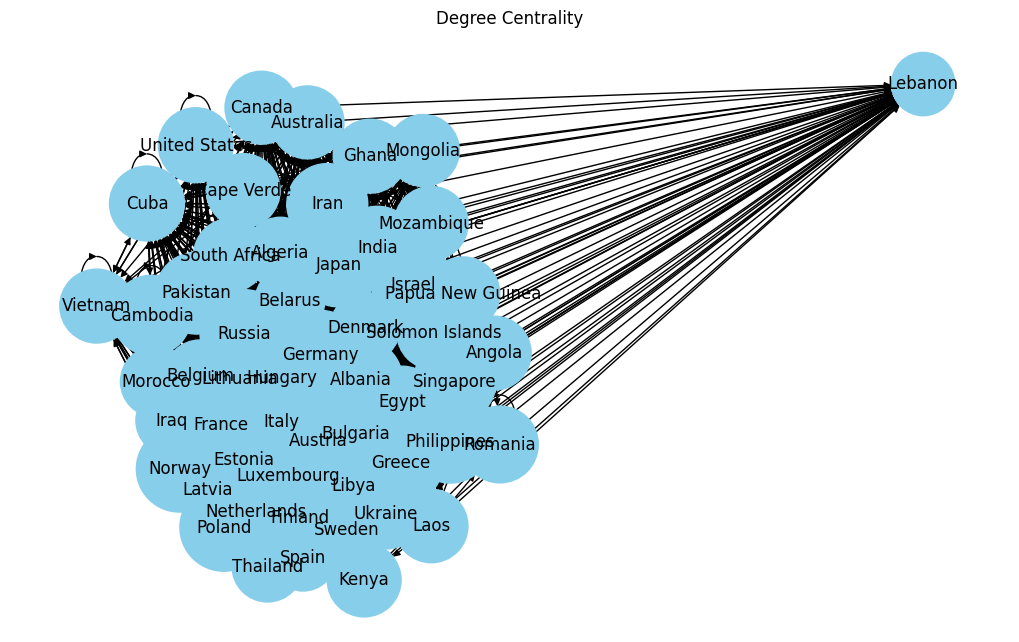

In [8]:
# Create a directed graph from the DataFrame
G = nx.from_pandas_edgelist(relationships_df, source='Country1', target='Country2', create_using=nx.DiGraph())

# Calculate centrality measures
degree_centrality = nx.degree_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)


# Visualize degree centrality
plt.figure(figsize=(10, 6))
nx.draw(G, pos=nx.spring_layout(G), with_labels=True, node_color='skyblue', node_size=[v * 2000 for v in degree_centrality.values()])
plt.title('Degree Centrality')
plt.show()



In [9]:
print(degree_centrality)

{'France': 2.0188679245283017, 'Italy': 2.0188679245283017, 'Russia': 2.0188679245283017, 'Germany': 2.0188679245283017, 'Austria': 2.0188679245283017, 'Hungary': 1.9056603773584906, 'Bulgaria': 1.9056603773584906, 'Spain': 1.1320754716981132, 'Poland': 2.0, 'Estonia': 1.8679245283018868, 'Latvia': 1.169811320754717, 'Lithuania': 1.849056603773585, 'Finland': 1.9811320754716981, 'Belgium': 1.2830188679245282, 'Netherlands': 1.2264150943396226, 'Luxembourg': 1.2264150943396226, 'Denmark': 1.2641509433962264, 'Norway': 1.9245283018867925, 'Sweden': 1.2264150943396226, 'Greece': 1.8867924528301887, 'Albania': 1.7735849056603772, 'Ukraine': 1.2641509433962264, 'Belarus': 1.2641509433962264, 'Libya': 1.5471698113207546, 'Egypt': 1.320754716981132, 'Iraq': 1.2830188679245282, 'Japan': 1.8113207547169812, 'Morocco': 1.3018867924528301, 'Algeria': 1.3018867924528301, 'Thailand': 1.3018867924528301, 'Singapore': 1.7735849056603772, 'Solomon Islands': 1.3773584905660377, 'Philippines': 1.7547169

**Inferences**

The output for degree centrality provides information about the centrality or importance of each country in the network based on the number of connections it has with other countries. Higher values of degree centrality indicate that a country is more connected to other countries in the network, while lower values suggest fewer connections

France, Italy, Russia, Germany, and Austria have the highest degree centrality, with a value of approximately 2.018. These countries are at the core of the network, indicating that they have strong connections with a large number of other countries. They may play essential roles in the relationships and interactions among countries.

Many European countries, such as Hungary, Bulgaria, Spain, Poland, Estonia, Latvia, Lithuania, Finland, Belgium, Netherlands, Luxembourg, Denmark, Norway, Sweden, Greece, Albania, Ukraine, and Belarus, have relatively high degree centrality values (around 1.8 or above). These countries are well-connected within the network and likely share historical, political, or geographical ties

Some countries, like Philippines, India, Pakistan, Israel, Singapore, and United States, have degree centrality values around 1.4 to 1.7. While they are connected to the network, their centrality is relatively lower compared to countries with high degree of centrality on the basis of varying degree centrality values we can suggest that the network might have regional clustering, where groups of countries are more connected to each other within specific regions or continents.

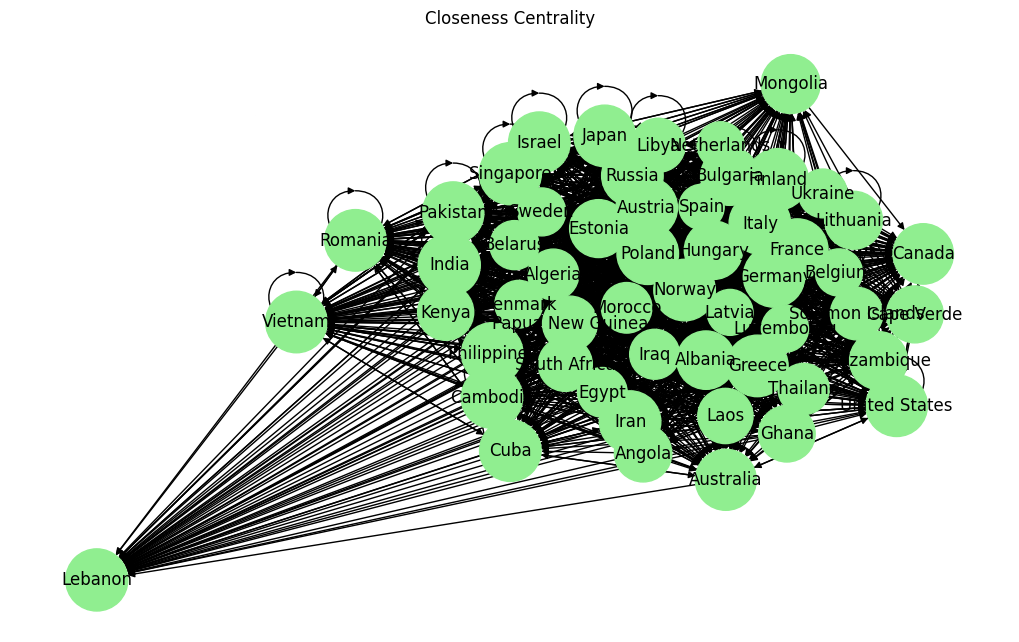

In [10]:
# Visualize closeness centrality
plt.figure(figsize=(10, 6))
nx.draw(G, pos=nx.spring_layout(G), with_labels=True, node_color='lightgreen', node_size=[v * 2000 for v in closeness_centrality.values()])
plt.title('Closeness Centrality')
plt.show()

In [11]:
print(closeness_centrality)

{'France': 0.9814814814814815, 'Italy': 0.9814814814814815, 'Russia': 0.9814814814814815, 'Germany': 0.9814814814814815, 'Austria': 0.9814814814814815, 'Hungary': 0.8833333333333333, 'Bulgaria': 0.8833333333333333, 'Spain': 0.53, 'Poland': 0.9814814814814815, 'Estonia': 0.8688524590163934, 'Latvia': 0.5463917525773195, 'Lithuania': 0.8688524590163934, 'Finland': 0.9814814814814815, 'Belgium': 0.5760869565217391, 'Netherlands': 0.5698924731182796, 'Luxembourg': 0.5760869565217391, 'Denmark': 0.5888888888888889, 'Norway': 0.9814814814814815, 'Sweden': 0.5955056179775281, 'Greece': 0.9814814814814815, 'Albania': 0.8833333333333333, 'Ukraine': 0.6162790697674418, 'Belarus': 0.6235294117647059, 'Libya': 0.7571428571428571, 'Egypt': 0.6385542168674698, 'Iraq': 0.6463414634146342, 'Japan': 0.9814814814814815, 'Morocco': 0.6625, 'Algeria': 0.6708860759493671, 'Thailand': 0.6794871794871795, 'Singapore': 1.0, 'Solomon Islands': 0.7162162162162162, 'Philippines': 0.9814814814814815, 'India': 1.0

**Inferences**

The output for closeness centrality provides information about how central or well-connected each country is to other countries in the network based on the average shortest path length. Higher values of closeness centrality indicate that a country is closer to other countries in terms of the average distance required to reach them

Countries with high closeness centrality values (close to 1.0), such as Singapore, India, Pakistan, Israel, Iran, Cuba, United States, and Vietnam, are highly central and easily accessible within the network. These countries have shorter average distances to other countries, suggesting strong connectivity 

Many European countries, like France, Italy, Russia, Germany, Austria, Poland, Finland, and Greece, have relatively high closeness centrality values, indicating that they are well-connected within the network and have shorter average distances to other countries. 

Some countries have relatively lower closeness centrality values (around 0.5 to 0.6), like Spain, Latvia, Netherlands, Belgium, Morocco, Algeria, Thailand, and South Africa. These countries are less central and may be relatively isolated from other countries in the network.

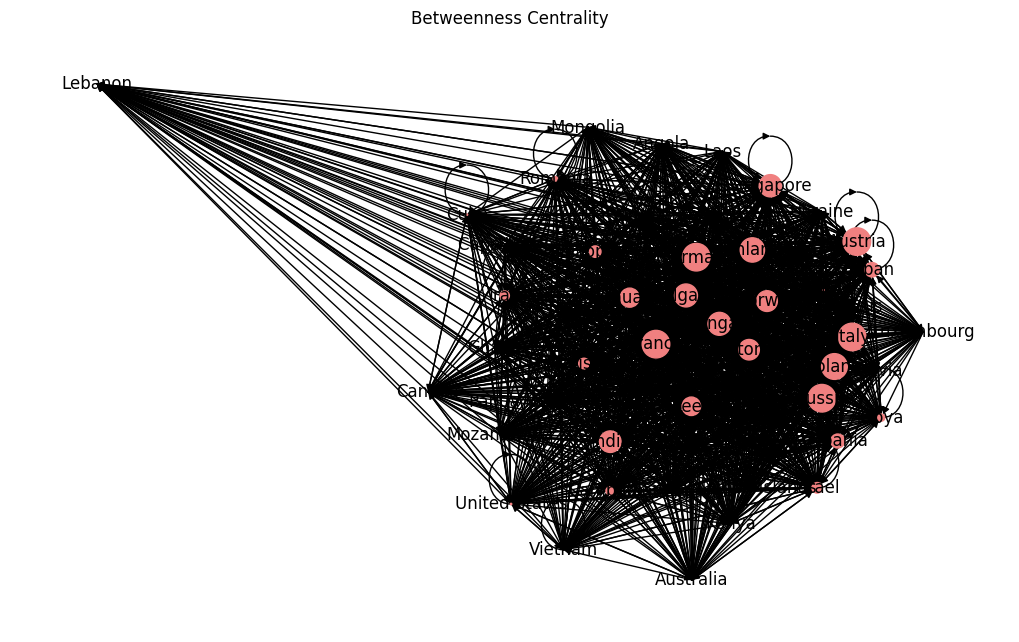

In [14]:
# Visualize betweenness centrality
plt.figure(figsize=(10, 6))
nx.draw(G, pos=nx.spring_layout(G), with_labels=True, node_color='lightcoral', node_size=[v * 20000 for v in betweenness_centrality.values()])
plt.title('Betweenness Centrality')
plt.show()

In [15]:
print(betweenness_centrality)

{'France': 0.0196695248909079, 'Italy': 0.0196695248909079, 'Russia': 0.0196695248909079, 'Germany': 0.0196695248909079, 'Austria': 0.0196695248909079, 'Hungary': 0.013614930822995303, 'Bulgaria': 0.013614930822995303, 'Spain': 0.0, 'Poland': 0.01716071294813369, 'Estonia': 0.010868282583737635, 'Latvia': 0.0, 'Lithuania': 0.00941690377386826, 'Finland': 0.015301133847988556, 'Belgium': 3.023705853894533e-05, 'Netherlands': 0.0, 'Luxembourg': 0.0, 'Denmark': 0.0, 'Norway': 0.011149232290426622, 'Sweden': 0.0, 'Greece': 0.008808883959512253, 'Albania': 0.00502984452564485, 'Ukraine': 0.0, 'Belarus': 0.0, 'Libya': 0.001297673762296404, 'Egypt': 0.0, 'Iraq': 0.0, 'Japan': 0.005379137605237598, 'Morocco': 0.0, 'Algeria': 0.0, 'Thailand': 0.0, 'Singapore': 0.012810825112215379, 'Solomon Islands': 0.0, 'Philippines': 0.0033768628480644364, 'India': 0.011969642001331937, 'Pakistan': 0.0028985244396483372, 'Israel': 0.0028985244396483372, 'South Africa': 0.0, 'Iran': 0.0022413723674019254, 'Pa

**Inferences**

The output for betweenness centrality provides information about the extent to which a country acts as a bridge or intermediary in the flow of information between other countries in the network. Higher betweenness centrality values indicate that a country plays a more crucial role in connecting other countries and facilitating communication between them.

Many countries have relatively low betweenness centrality values (close to 0), including Spain, Latvia, Netherlands, Luxembourg, Denmark, Sweden, Ukraine, Belarus, Egypt, Iraq, Morocco, Algeria, Thailand, Solomon Islands, Papua New Guinea, Laos, Kenya, Ghana, Cape Verde, Angola, Mozambique, Mongolia, Canada, Australia, Vietnam, and Lebanon. These countries have minimal influence in acting as intermediaries or bridges between other countries in the network.

Some countries have moderate betweenness centrality values, such as Poland, Estonia, Lithuania, Finland, Greece, Albania, Libya, Japan, Singapore, Philippines, India, Pakistan, Israel, Iran, Cambodia, and Romania. These countries have a moderate role in connecting other countries within the network.

Few countries have relatively higher betweenness centrality values, such as Hungary and Belgium.

France, Italy, Russia, Germany, and Austria have the highest betweenness centrality values. These countries act as significant bridges and play a critical role in the flow of information and communication between other countries in the network.